In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("../input/supermarket-sale-dataset/supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1



###    ***step:1)*** Let's check whether this dataset has null value or not , For that are going to draw heatmap.

<AxesSubplot:>

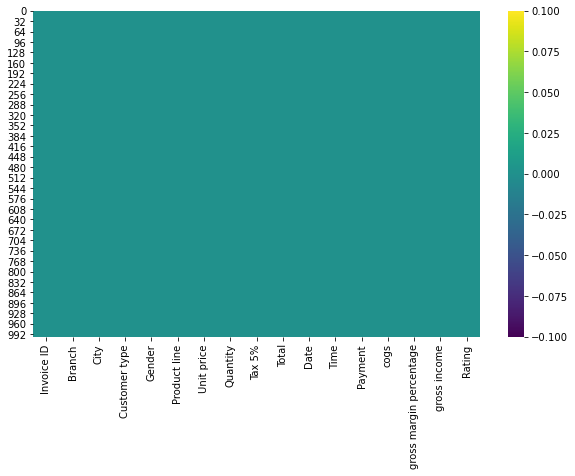

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap="viridis")

### ***Step:2)* ** Let's check which product line has the most sales ,cost , profit and rating 

## So there is not null value in the dataset

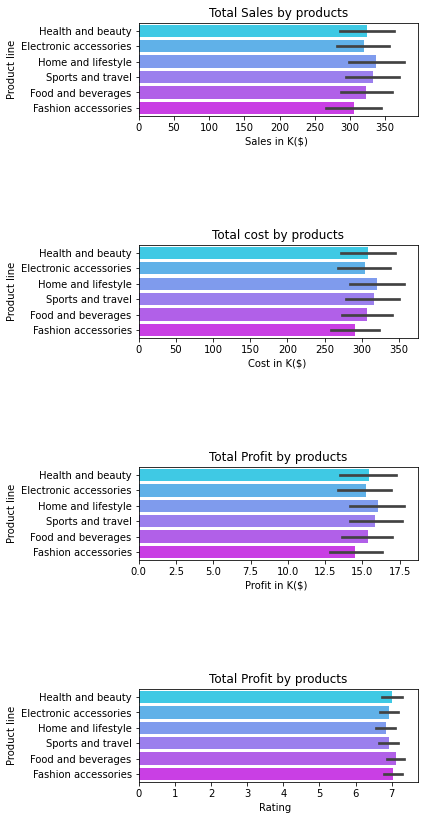

In [4]:
plt.figure(figsize=(5,16))
plt.subplot(8,1,1)
sns.barplot(x="Total",y="Product line",data=df ,palette="cool")
plt.ylabel("Product line")
plt.xlabel("Sales in K($) ")
plt.title("Total Sales by products")


plt.subplot(8,1,3)
sns.barplot(y=df["Product line"],x=df["cogs"],data=df ,palette="cool")
plt.ylabel("Product line")
plt.xlabel("Cost in K($) ")
plt.title("Total cost by products")



plt.subplot(8,1,5)
sns.barplot(y=df["Product line"],x=df["gross income"],data=df ,palette="cool")
plt.ylabel("Product line")
plt.xlabel("Profit in K($) ")
plt.title("Total Profit by products")



plt.subplot(8,1,7)
sns.barplot(y=df["Product line"],x=df["Rating"],data=df ,palette="cool")
plt.ylabel("Product line")
plt.xlabel("Rating  ")
plt.title("Total Profit by products")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


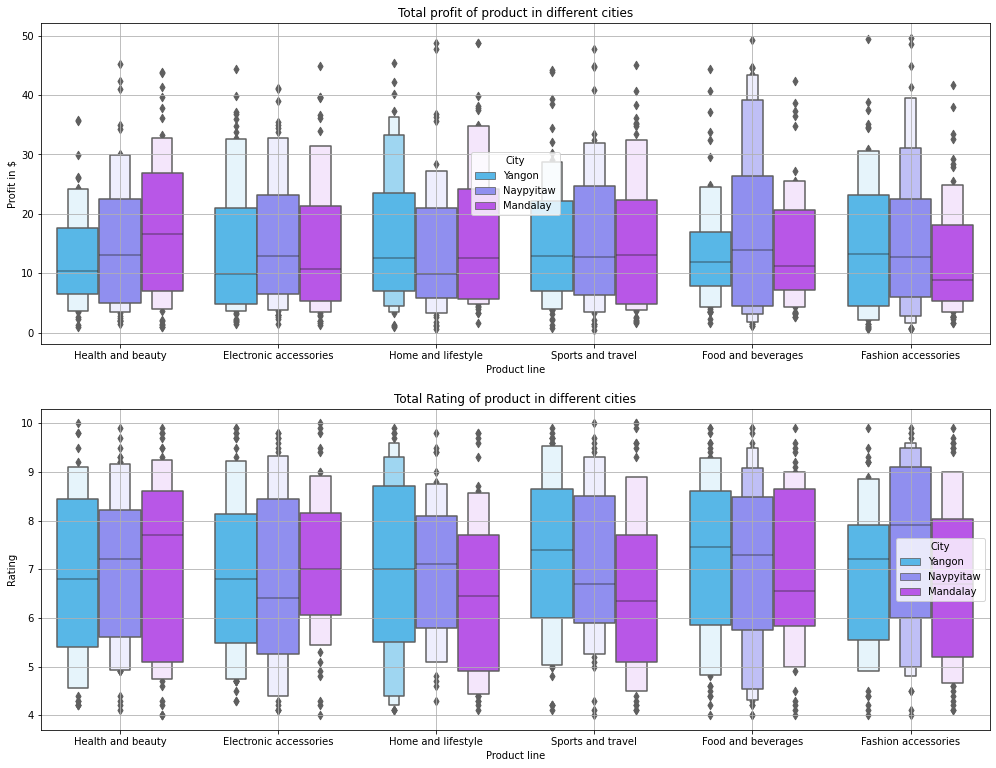

In [5]:
plt.figure(figsize=(17,13))
plt.subplot(2,1,1)
sns.boxenplot(df["Product line"],df["gross income"],hue=df["City"],palette="cool")
plt.ylabel("Profit in $")
plt.title("Total profit of product in different cities")
plt.grid()

plt.subplot(2,1,2)
sns.boxenplot(df["Product line"],df["Rating"],hue=df["City"],palette="cool")
plt.ylabel("Rating")
plt.title("Total Rating of product in different cities")
plt.grid()

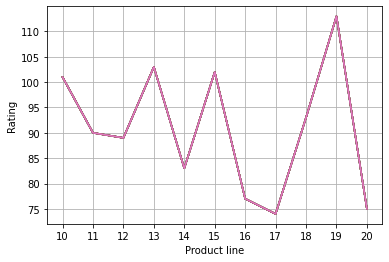

In [6]:
df["Hour"]=df["Time"].str[0:2]
group_hour=df.groupby(df["Hour"])
Hours=[hour for hour ,df in group_hour]
plt.plot(Hours,df.groupby(["Hour"]).count())
#plt.xticks(Hours,rotation="vertical")
plt.ylabel("Rating")
plt.xlabel("Product line")
plt.grid()

## **Q:** What time we sould display advertisement to maximize liklihood of customer's buying product

## *A*:This Line plot clearly shows that time between 17 to 19 is good for advertisement

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

Text(0.5, 1.0, 'which payment methode is most often used')

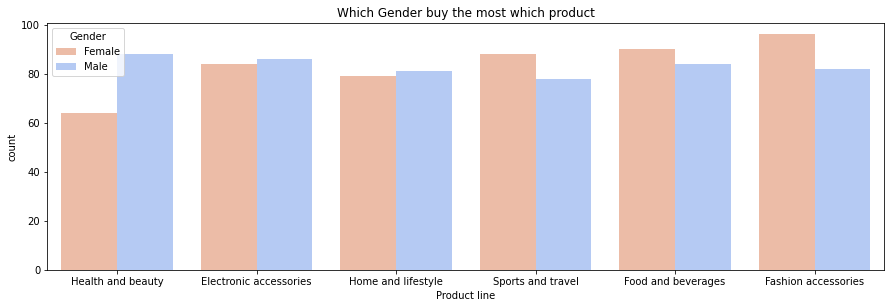

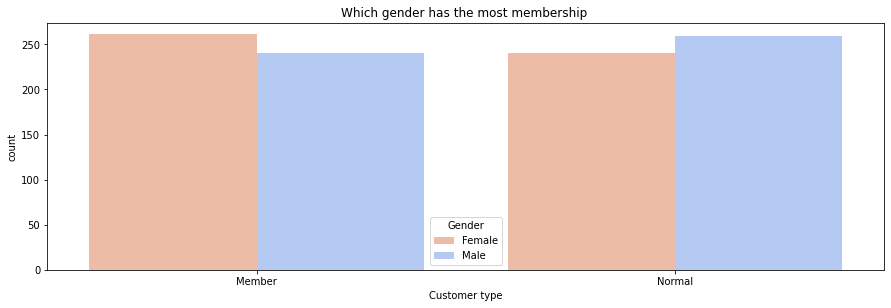

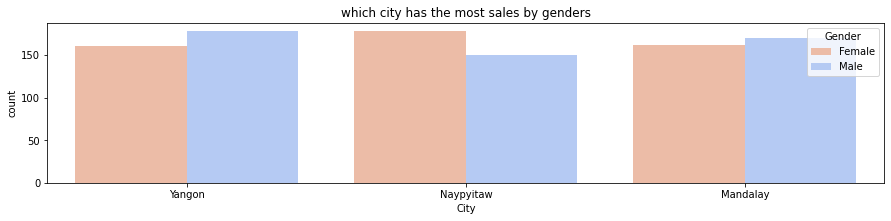

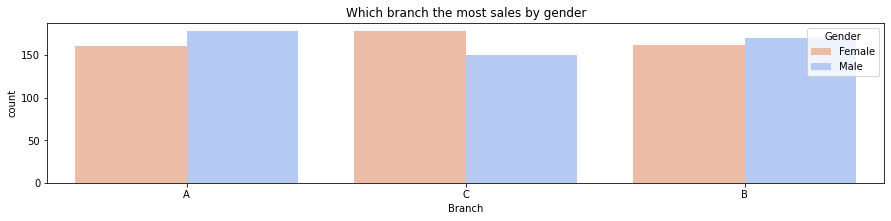

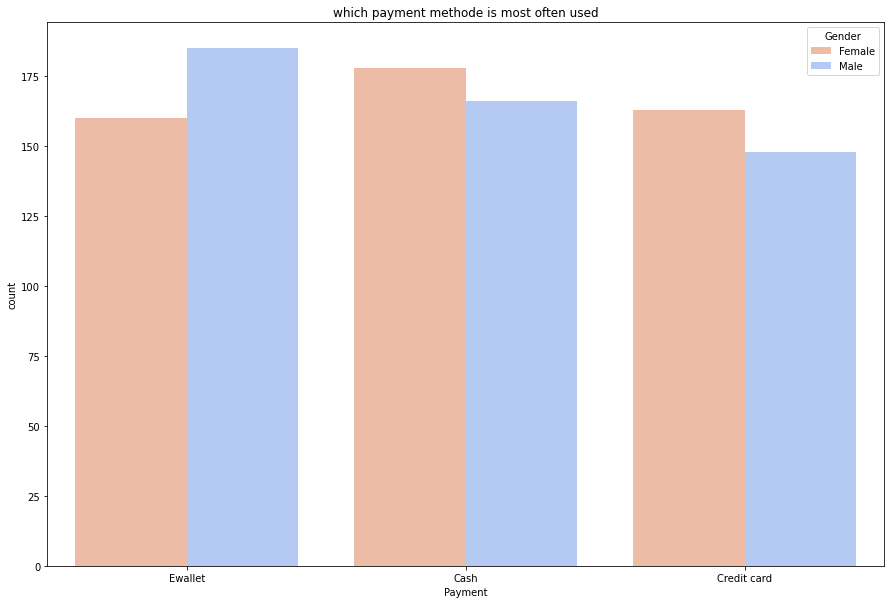

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(df["Product line"],hue=df["Gender"],palette="coolwarm_r")
plt.title("Which Gender buy the most which product")


plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.countplot(df["Customer type"],hue=df["Gender"],palette="coolwarm_r")
plt.title("Which gender has the most membership ")

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.countplot(df["City"],hue=df["Gender"],palette="coolwarm_r")
plt.title("which city has the most sales by genders")

plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
sns.countplot(df["Branch"],hue=df["Gender"],palette="coolwarm_r")
plt.title("Which branch the most sales by gender")

plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.countplot(df["Payment"],hue=df["Gender"],palette="coolwarm_r")
plt.title("which payment methode is most often used")

In [8]:
import plotly.express as px
fig = px.pie(df, values='Total', names='Product line', title='total sales of products')
fig.show()


In [9]:
fig = px.pie(df, values='gross income', names='Product line', title='Profit % of products')
fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Branch', ylabel='count'>

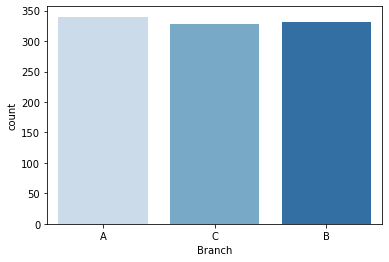

In [10]:
sns.countplot(df["Branch"], palette="Blues")

# **Conclusion:-**

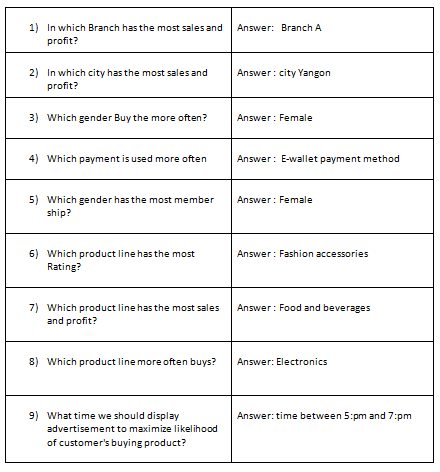

In [11]:
from IPython.display import Image
import os
Image("../input/conclusion-table-of-sales/table of suprer market sale.png")